<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/notebooks/katas/algorithms/DecisionTree_Tuning.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


## Instructions

This is a self-correcting exercise generated by [nbgrader](https://github.com/jupyter/nbgrader). 

Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

---

# Kata: Tuning a Decision Tree

In this kata, you'll search for the best hyperparameters for a `DecisionTreeClassifier` on a planar dataset.

## Package setup

In [1]:
# The mlkatas package contains various utility functions required by all katas
!pip install mlkatas

In [2]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import mlkatas

In [3]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [4]:
# Import ML packages (edit this list if needed)
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

## Step 1: Preparing the data

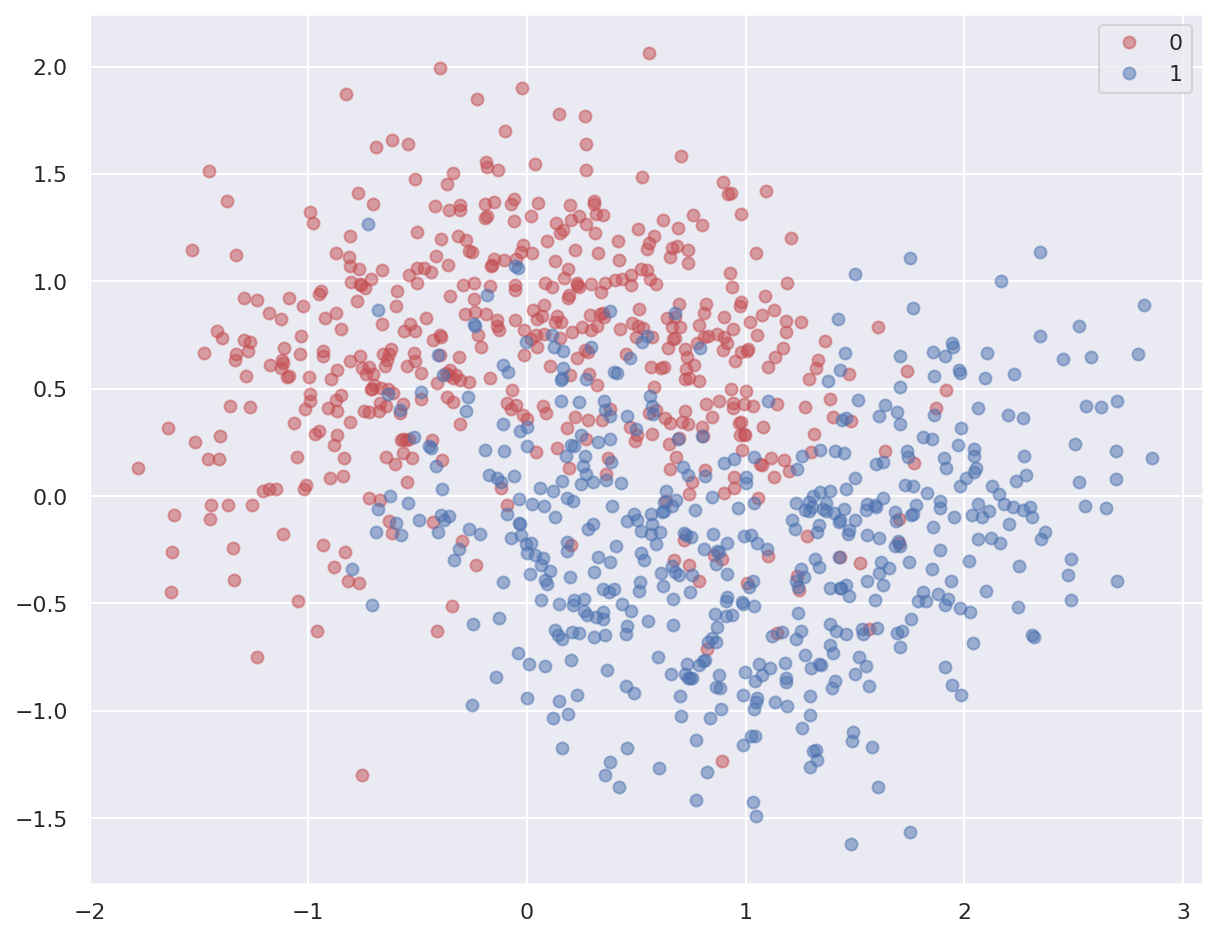

In [5]:
# Generate moon-shaped, noisy data
x, y = make_moons(n_samples=1000, noise=0.4)

mlkatas.plot_planar_data(x, y)

## Step 3: Training a classifier

### Question¶

Split data and labels into the `x_train`, `x_test`, `y_train` and `y_test` variable using a 25% ratio.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [7]:
print(f'x_train: {x_train.shape}. y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}. y_test: {y_test.shape}')

assert x_train.shape == (750, 2)
assert y_train.shape == (750,)
assert x_test.shape == (250, 2)
assert y_test.shape == (250,)

x_train: (750, 2). y_train: (750,)
x_test: (250, 2). y_test: (250,)


### Question

Create a `DecisionTreeClassifier` instance and store it into the model variable. Fit this model on the training data.

In [8]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [9]:
# Compute accuracy on training and test sets
train_acc = model.score(x_train, y_train)
test_acc = model.score(x_test, y_test)

print(f'Training accuracy: {train_acc * 100:.2f}%')
print(f'Test accuracy: {test_acc * 100:.2f}%')

assert train_acc > .95
assert test_acc > .75

Training accuracy: 100.00%
Test accuracy: 79.20%


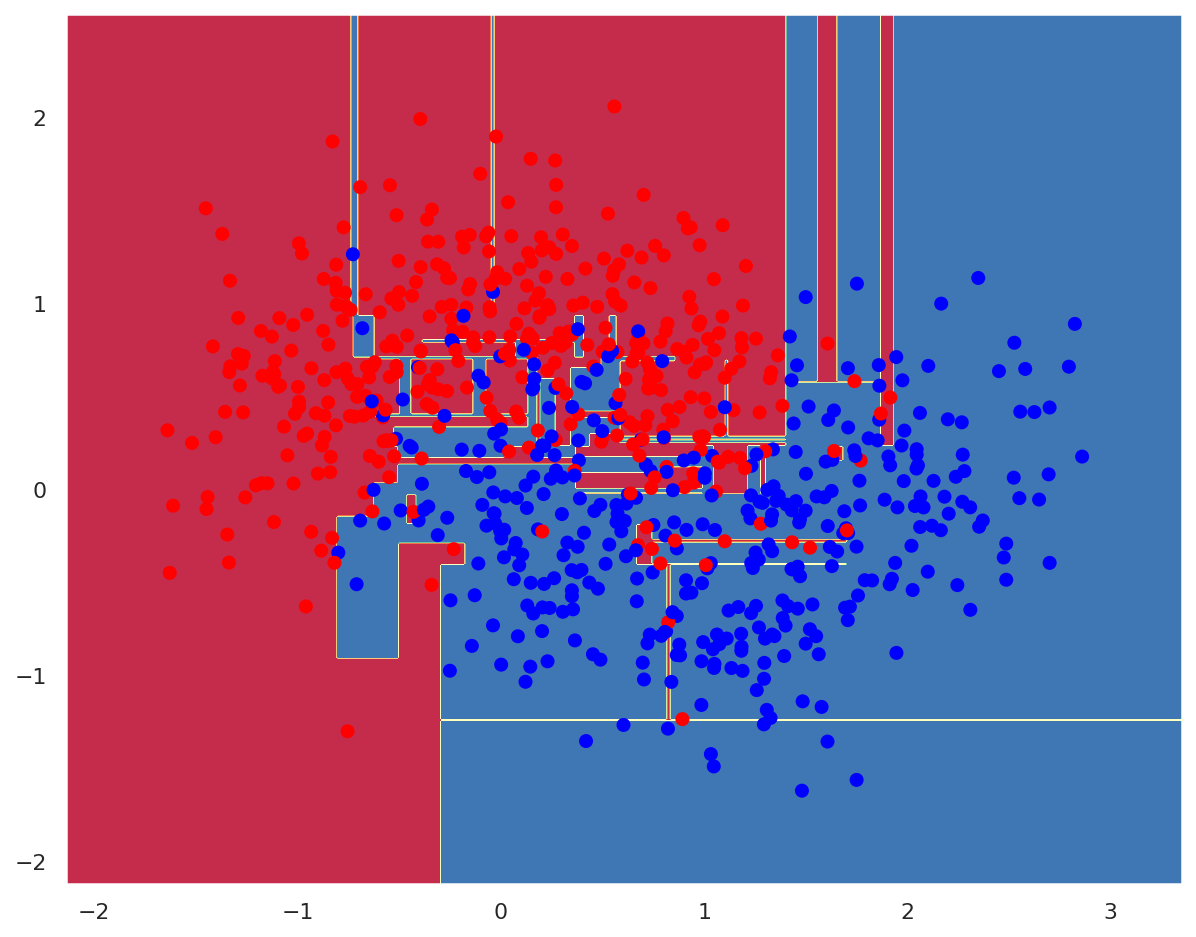

In [10]:
# Plot the decision boundary
mlkatas.plot_decision_boundary(lambda x: model.predict(x), x_train, y_train)

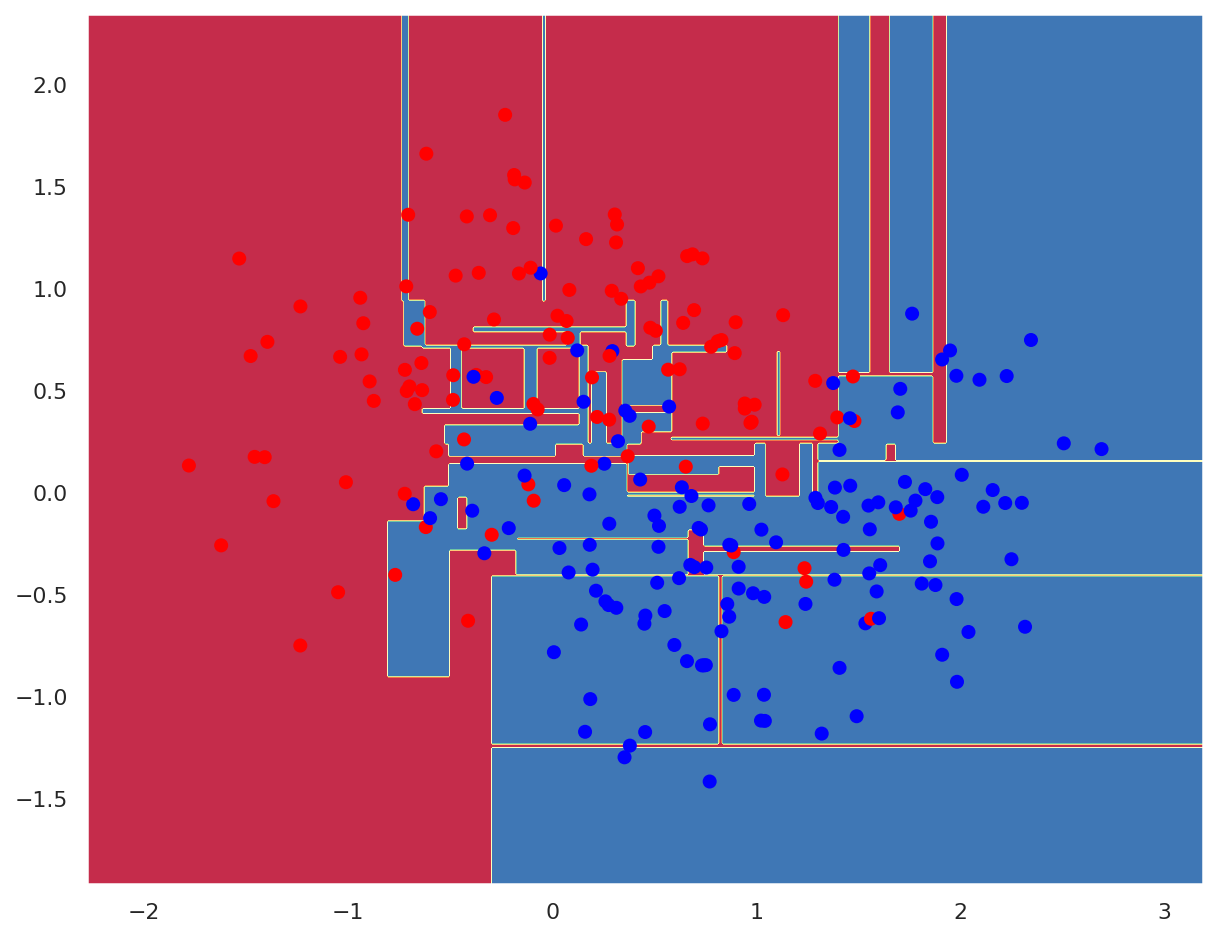

In [11]:
# Plot the decision boundary for test data
mlkatas.plot_decision_boundary(lambda x: model.predict(x), x_test, y_test)

## Step 4: Tuning the classifier

### Question

Search for the best values of `max_leaf_nodes` and `min_samples_split` through a `GridSearchCV` instance, stored in the `grid_search_cv` variable.

The final test accuracy should be around 85%.

In [18]:
from sklearn.model_selection import GridSearchCV
param = {'max_leaf_nodes':np.arange(2,50) , 'min_samples_split': np.arange(2,20)}
grid_search_cv = GridSearchCV(model, param_grid=param, cv=5)

In [19]:
# Search for the best parameters with the specified classifier on training data
grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 2

In [14]:
# Display the best found classifier
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [15]:
# Compute accuracy on training and test sets
train_acc = grid_search_cv.score(x_train, y_train)
test_acc = grid_search_cv.score(x_test, y_test)

print(f'Training accuracy: {train_acc * 100:.2f}%')
print(f'Test accuracy: {test_acc * 100:.2f}%')

Training accuracy: 87.87%
Test accuracy: 87.60%


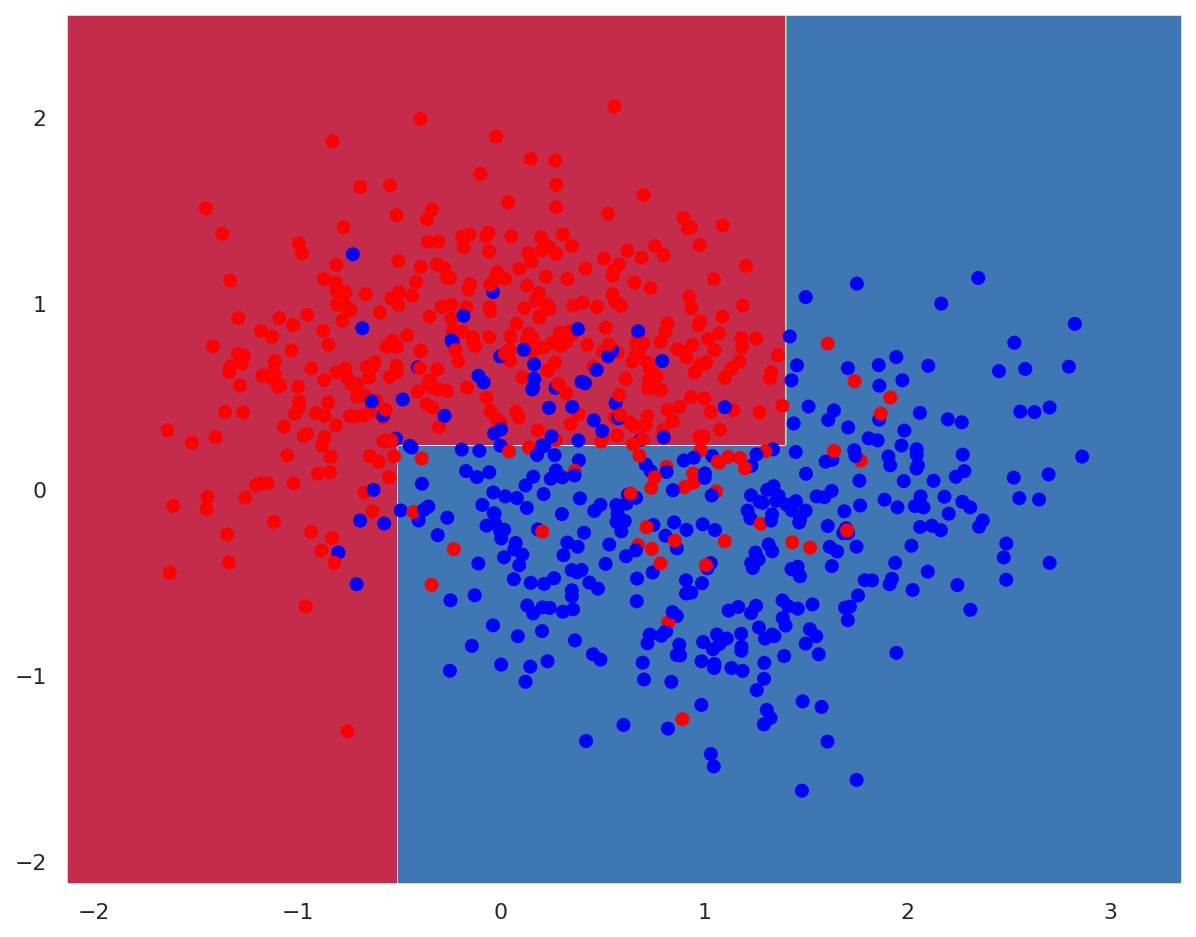

In [16]:
# Plot the decision boundary
mlkatas.plot_decision_boundary(lambda x: grid_search_cv.predict(x), x_train, y_train)